# %% [markdown]

  # Empirical Results
  ## R (Pearson Correlation)
 - **Pearson Correlation** of ica_arima **better** than just arima

In [ ]:
# %%

pearsonr(df_ret, df_ica_pred, alternative="greater"), \
    pearsonr(df_ret, df_arma_pred, alternative="greater")

(PearsonRResult(statistic=0.01340416190293595, pvalue=0.0630091125365575),
 PearsonRResult(statistic=0.005678315103859606, pvalue=0.2584545828881826))

# %% [markdown]

 ## Directional accuracy
 - Diebold Mariano test shows **Directional Accuarcy** (correct sign of returns predicted) for ica_arima significantly **better** than arima

In [ ]:
#%%

print("Diebold Mariano test statistic, p-value:",
dm_test(
    np.sign(df_ret).values,
    np.sign(df_ica_pred).values,
    np.sign(df_arma_pred).values,
    loss=lambda a, b: abs(a - b),
    one_sided=True))

Diebold Mariano test statistic, p-value: (-1.1580454616279916, 0.12343335583198067)


# %% [markdown]

 ## Mean Absolute Error
 - Diebold Mariano test shows **Mean Absolute Error** of ica_arima predicitons significantly **better** than arima

In [ ]:
#%%

print("Diebold Mariano test statistic, p-value:",
dm_test(
    df_ret.values,
    df_ica_pred.values,
    df_arma_pred.values,
    loss=lambda a, b: abs(a - b),
    one_sided=True))

Diebold Mariano test statistic, p-value: (-10.756302880194324, 3.5880904215227915e-27)


# %% [markdown]

 ## Mean Squared Error
 - Diebold Mariano test shows **Mean Squared Error** of ica_arima predicitons significantly **better** than arima

In [ ]:
#%%

print("Diebold Mariano test statistic, p-value:",
dm_test(
    df_ret.values,
    df_ica_pred.values,
    df_arma_pred.values,
    loss=lambda a, b: (a - b)**2,
    one_sided=True))

Diebold Mariano test statistic, p-value: (-6.523036238661388, 3.572181247611614e-11)


# %% [markdown]

 ## Comaparison of ARIMA orders
 - for just ARIMA the AutoARIMA algorithm determined Brownian Noise with order (0, 1, 0) to be the best model of the process
 way more often than for ica + ARIMA, indicating application of ICA improved the Signal to Noise Ratio

Text(0, 0.5, 'count')

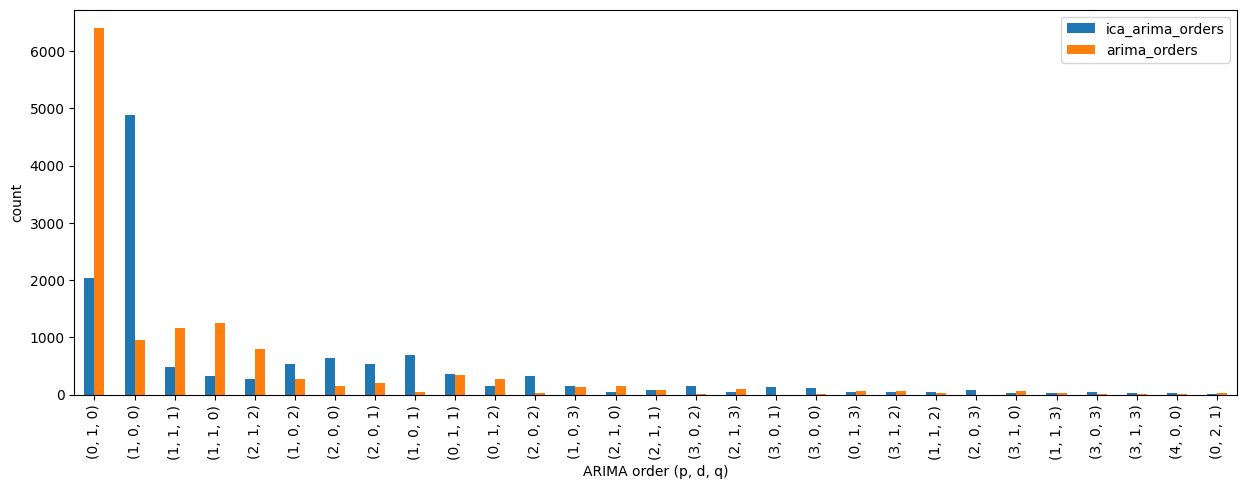

In [ ]:
#%%

n_train_days = 120
tick = "24h"
ica_orders = pd.read_csv(f"../data/ica_arma_orders_{tick}_{n_train_days}D.csv", index_col=0)
arima_orders = pd.read_csv(f"../data/arma_orders_{tick}_{n_train_days}D.csv", index_col=0)
orders = pd.concat((
    ica_orders.unstack().value_counts().rename("ica_arima_orders"),
    arima_orders.unstack().value_counts().rename("arima_orders")
    ), axis=1, join="inner")

orders.iloc[np.argsort(orders.sum(axis=1))[:-30:-1]].plot.bar(figsize=(15, 5))
plt.xlabel("ARIMA order (p, d, q)")
plt.ylabel("count")